## DETAIL DATABASE ##

In [7]:
### Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [8]:
## Read database
engagement = pd.read_excel('Engagement_rate.xlsx')
engagement

,Engagement,Day
0,0.553009,2024-01-01
1,0.643585,2024-01-02
2,0.629398,2024-01-03
3,0.607667,2024-01-04
4,0.511754,2024-01-05
...,...,...
86,0.686379,2024-03-27
87,0.639021,2024-03-28
88,0.631415,2024-03-29
89,0.663192,2024-03-30


In [9]:
# Convert DataFrame to datetime index
df = pd.DataFrame(engagement)
df['Day'] = pd.to_datetime(df['Day'])
df.set_index('Day', inplace=True)

# Now, 'df' is your DataFrame with datetime index
print(df)

            Engagement
Day                   
2024-01-01    0.553009
2024-01-02    0.643585
2024-01-03    0.629398
2024-01-04    0.607667
2024-01-05    0.511754
...                ...
2024-03-27    0.686379
2024-03-28    0.639021
2024-03-29    0.631415
2024-03-30    0.663192
2024-03-31    0.678008

[91 rows x 1 columns]


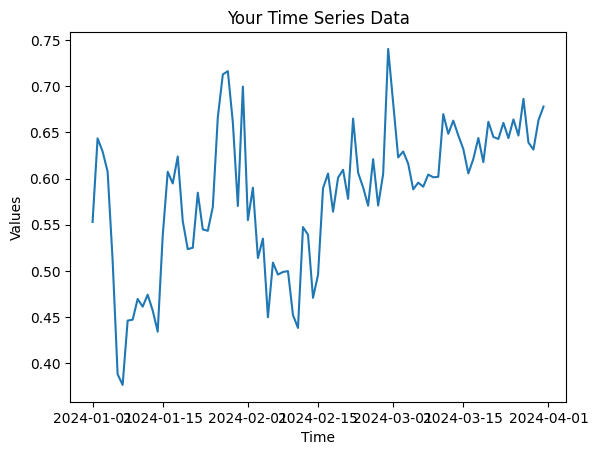

In [10]:
## Visualize the timeseries
plt.plot(df)
plt.title('Your Time Series Data')
plt.xlabel('Time')
plt.ylabel('Values')
plt.show()

In [11]:
# Decompose the time series (To visualize the original, the trend, the seasonality and the residual)
decomposition = seasonal_decompose(df, model='additive')


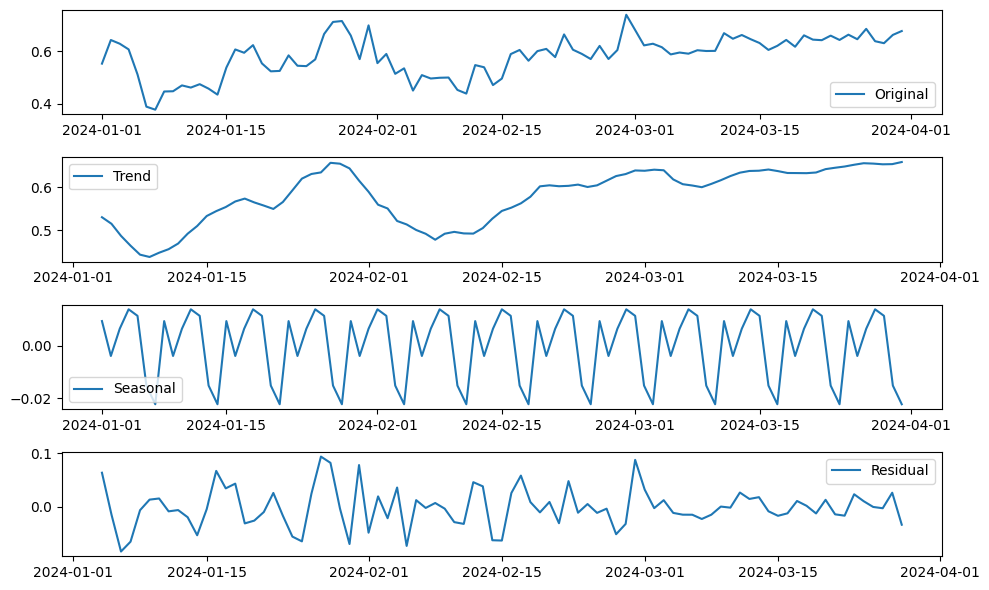

In [12]:
plt.figure(figsize=(10, 6))
plt.subplot(411)
plt.plot(df, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [13]:
## To know if the serie is stationary 
## the null hypothesis of the Dickey-Fuller test is that there is a unit root present in the time series data, 
## which implies non-stationarity. Therefore, rejecting the null hypothesis suggests the presence of stationarity
## in the series.

# Perform Dickey-Fuller test
result = adfuller(df)

# Extract and print test results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

### Conclusions
## If the p-value is less than the significance level (commonly chosen as 0.05), you can reject the null hypothesis,
## indicating that the time series is stationary.
## If the ADF Statistic is more negative than the critical values at significant levels, again, 
## you can reject the null hypothesis.

ADF Statistic: -3.196615610061088
p-value: 0.0201814186901607
Critical Values:
	1%: -3.505
	5%: -2.894
	10%: -2.584


In [14]:
# Assuming you have a time series stored in a pandas DataFrame or Series
# Replace 'your_data' with your actual data
time_series = df

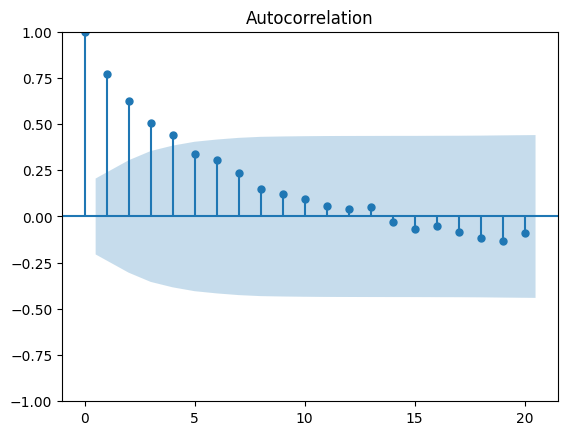

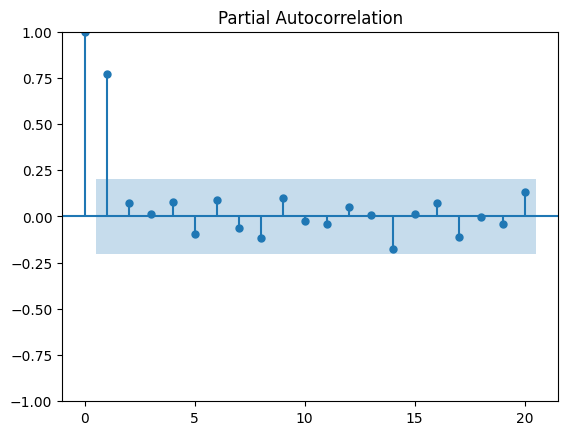

In [15]:
# Plot ACF and PACF
plot_acf(df, lags=20)
plot_pacf(df, lags=20)
plt.show()

In [21]:
# Replace p, d, q with the determined values
p, d, q = (1, 1, 1)

# Fit ARIMA model
model = ARIMA(df, order=(p, d, q))
result = model.fit()

# Summary of the model
print(result.summary())

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             Engagement   No. Observations:                   91
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 143.343
Date:                Sun, 28 Apr 2024   AIC                           -280.686
Time:                        21:18:28   BIC                           -273.186
Sample:                    01-01-2024   HQIC                          -277.662
                         - 03-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7087      0.118      6.009      0.000       0.478       0.940
ma.L1         -0.9423      0.070    -13.409      0.000      -1.080      -0.805
sigma2         0.0024      0.000      8.042      0.0

In [17]:
# Forecast next 'n' time steps
n = 10  # Number of time steps to forecast
forecast = result.forecast(steps=n)
forecast

2024-04-01    0.667021
2024-04-02    0.659234
2024-04-03    0.653716
2024-04-04    0.649806
2024-04-05    0.647034
2024-04-06    0.645070
2024-04-07    0.643678
2024-04-08    0.642692
2024-04-09    0.641993
2024-04-10    0.641498
Freq: D, Name: predicted_mean, dtype: float64

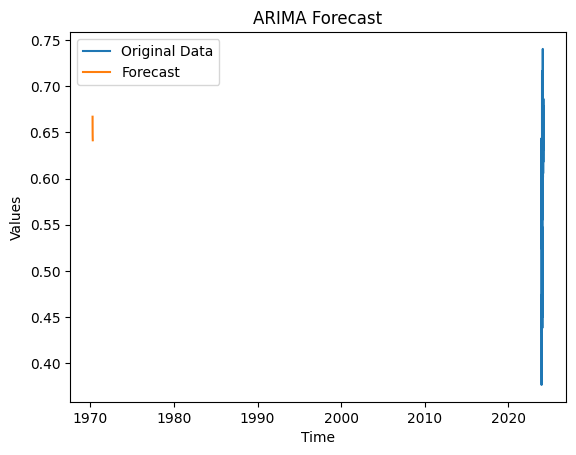

In [18]:
# Plot original data and forecasted values
plt.plot(df, label='Original Data')
plt.plot(np.arange(len(df), len(df) + n), forecast, label='Forecast')
plt.title('ARIMA Forecast')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()

In [19]:
# Define a function to perform grid search for ARIMA parameters
def grid_search_arima(df, p_range, d_range, q_range):
    best_aic = float("inf")
    best_order = None

    # Generate all possible combinations of p, d, q
    orders = list(itertools.product(p_range, d_range, q_range))

    # Perform grid search
    for order in orders:
        try:
            model = ARIMA(df, order=order)
            results = model.fit()

            # Check if AIC is better than the current best AIC
            if results.aic < best_aic:
                best_aic = results.aic
                best_order = order
        except:
            continue

    return best_order, best_aic

# Load your time series data
# Replace 'your_data.csv' with the path to your data file
# data = pd.read_excel('Engagement_rate.xlsx',parse_dates=['Day'])

# Define ranges for p, d, q
p_range = range(0, 3)  # Change these ranges based on your data and requirements
d_range = range(0, 3)
q_range = range(0, 3)

# Perform grid search
best_order, best_aic = grid_search_arima(df, p_range, d_range, q_range)
print("Best ARIMA order:", best_order)
print("Best AIC:", best_aic)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\l

Best ARIMA order: (1, 0, 0)
Best AIC: -284.74058455511386


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [23]:
# Replace p, d, q with the determined values
p, d, q = (1, 0, 0)

# Fit ARIMA model
model = ARIMA(df, order=(p, d, q))
result1 = model.fit()

# Summary of the model
print(result1.summary())

                               SARIMAX Results                                
Dep. Variable:             Engagement   No. Observations:                   91
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 145.370
Date:                Sun, 28 Apr 2024   AIC                           -284.741
Time:                        21:20:13   BIC                           -277.208
Sample:                    01-01-2024   HQIC                          -281.702
                         - 03-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5847      0.023     25.288      0.000       0.539       0.630
ar.L1          0.7769      0.070     11.080      0.000       0.639       0.914
sigma2         0.0024      0.000      7.868      0.0

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [24]:
# Forecast next 'n' time steps
n = 10  # Number of time steps to forecast
forecast = result1.forecast(steps=n)
forecast

2024-04-01    0.657176
2024-04-02    0.640992
2024-04-03    0.628420
2024-04-04    0.618653
2024-04-05    0.611066
2024-04-06    0.605171
2024-04-07    0.600592
2024-04-08    0.597035
2024-04-09    0.594271
2024-04-10    0.592124
Freq: D, Name: predicted_mean, dtype: float64